In [557]:
%matplotlib inline
import torch
import numpy
import pickle
import matplotlib.pyplot as plot


In [558]:
shp_original_img = (100, 100)  # Shape of the original image
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )
# broken_image = pickle.load(open('mysterious_image_t.p', 'rb'),encoding='latin1' ) # mysterious_image is a vector representing the morphed image

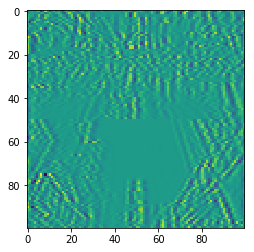

In [559]:
plot.imshow(  numpy.reshape(broken_image, (100,100)))

In [560]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for ii in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if ii % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [561]:
def distance_loss(hypothesis, broken_image):
    
    return torch.dist(hypothesis, broken_image, 2)
#     return (hypothesis - broken_image).pow(2).sum()

In [562]:
random_tensor = torch.randn(10000, dtype = torch.float)
print(random_tensor)
print(weird_function(random_tensor))

tensor([-1.6672e+00, -2.4542e-01, -1.2322e+00,  ..., -6.9887e-01,
         7.5742e-01,  2.6398e-01])
tensor([ 0.0177, -0.0917, -0.0930,  ...,  0.1102, -0.0083,  0.0087])


In [563]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at ', i, ' = ', loss.item())
    


Loss at  0  =  12.210269927978516
Loss at  1000  =  1.1463775634765625
Loss at  2000  =  0.5378768444061279
Loss at  3000  =  0.37143564224243164
Loss at  4000  =  0.2923630475997925
Loss at  5000  =  0.24425141513347626
Loss at  6000  =  0.21002037823200226
Loss at  7000  =  0.1829465627670288
Loss at  8000  =  0.15998150408267975
Loss at  9000  =  0.13958680629730225
Loss at  10000  =  0.12091375887393951
Loss at  11000  =  0.10345636308193207
Loss at  12000  =  0.08689352869987488
Loss at  13000  =  0.0710114911198616
Loss at  14000  =  0.05566156283020973
Loss at  15000  =  0.04073811322450638
Loss at  16000  =  0.026166604831814766
Loss at  17000  =  0.02115962840616703
Loss at  18000  =  0.02116633765399456
Loss at  19000  =  0.02116766944527626


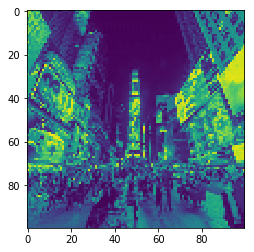

In [564]:

plot.imshow(  random_tensor.view(100,100).data  )

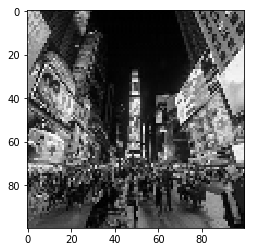

In [565]:
plot.imshow(  random_tensor.view(100,100).data,cmap = 'gray')


In [ ]:
#Sources are based on https://github.com/jcjohnson/pytorch-examples, NYU Intro2ML